In [56]:

import numpy as np
import pandas as pd
import os

import datetime as dt
from matplotlib import pyplot as plt


# For reading in the data in various forms
from netCDF4 import Dataset
import xarray as xr


In [222]:
# Read in various event files for Halloween storm 2003


#---------------------------------------------------------------------
# Historic data for Halloween 2003 storm
file_actual = '../github_pages/NSF_CHESS/data/synthetic_sw_data/omni_2003.asc'
header_actual = '../github_pages/NSF_CHESS/data/synthetic_sw_data/omni_2003_header.txt'
f = open(file_actual)
event_actual = f.read().split('\n')
# event_actual = [float(x) for x in event_actual]
f.close()

f = open(header_actual)
header_actual = f.read().split('\n')
f.close()

#---------------------------------------------------------------------
# Karthik-generated synthetic data
file1 = '../github_pages/NSF_CHESS/data/synthetic_sw_data/halloween_storm_plus.nc'
event1 = Dataset(file1)


#---------------------------------------------------------------------
# Chigo-generated synthetic data

file2 = '../github_pages/NSF_CHESS/data/synthetic_sw_data/Ngwira_data/Ngwira_synthetic_storm.txt'
f = open(file2)
event2 = f.read().split('\n')
f.close()



#---------------------------------------------------------------------
# UMich-generated synthetic data


#Solar wind data containing 15 space separated columns per line. 
# The first 7 columns are integers containing the date and time from year down to milliseconds in coordinated universal time, UTC. 
# The next three columns contain the 3 components of the interplanetary magnetic field BSW in nT
# The next 3 columns are the 3 components of the velocity vSW in km/s
# The next column is the number density nSW in cm-3
# The last column is the ion temperature TSW in K. 
# The vector quantities are in the GSM coordinate system by default
# Since BATS-R-US runs in single fluid MHD mode in the Geospace model using protons and negligible electron temperature, the mass density will be the number density times the proton mass, and the thermal pressure will be pSW = nSWkTSW.

# 0: yr
# 1: mo
# 2: dy
# 3: hr
# 4: mt
# 5: se
# 6: millisec
# 7: Bx
# 8: By
# 9: Bz
# 10: Vx
# 11: Vy
# 12: Vz
# 13: num den
# 14: Ti


#---------------------------------------------------------------------
# Welling-generated synthetic data
# https://zenodo.org/record/3620786
file3 = '../github_pages/NSF_CHESS/data/synthetic_sw_data/Welling_data/imf_extreme.dat'
f = open(file3)
event3 = f.read().split('\n')
f.close()


#---------------------------------------------------------------------
# Blake-generated synthetic data
# https://zenodo.org/record/4534660
file4 = '../github_pages/NSF_CHESS/data/synthetic_sw_data/Blake_data/SCENARIO1.txt'
f = open(file4)
event4 = f.read().split('\n')
f.close()





In [210]:
event4

['',
 '#COORDINATES',
 'GSM',
 '',
 '#POSITION',
 '0.0',
 '0.0',
 ' ',
 '#START',
 '2019.000 9.000 2.000 2.000 8.000 0.000 0.000 0.000 3.023 0.481 -441.127 5.763 12.688 26.888 505769.667',
 '2019.000 9.000 2.000 2.000 9.000 0.000 0.000 0.000 -0.453 2.587 -419.151 14.176 1.038 28.352 452377.423',
 '2019.000 9.000 2.000 2.000 10.000 0.000 0.000 0.000 1.603 0.967 -448.563 -13.099 9.076 27.032 339521.902',
 '2019.000 9.000 2.000 2.000 11.000 0.000 0.000 0.000 -1.674 -4.001 -439.041 20.320 -30.254 26.479 363677.359',
 '2019.000 9.000 2.000 2.000 12.000 0.000 0.000 0.000 -0.209 0.021 -472.899 -5.539 8.034 27.048 437242.530',
 '2019.000 9.000 2.000 2.000 13.000 0.000 0.000 0.000 -3.910 0.509 -436.778 -22.651 -4.672 26.973 451134.711',
 '2019.000 9.000 2.000 2.000 14.000 0.000 0.000 0.000 1.525 -0.559 -456.361 -29.860 -12.542 26.541 378079.007',
 '2019.000 9.000 2.000 2.000 15.000 0.000 0.000 0.000 -0.299 -2.302 -436.302 12.532 -16.798 26.373 200000.000',
 '2019.000 9.000 2.000 2.000 16.000 0.

In [21]:
header_actual

['  FORMAT OF THE SUBSETTED FILE',
 '    ',
 '    ITEMS                      FORMAT   ',
 '     ',
 ' 1 YEAR                          I4        ',
 ' 2 DOY                           I4        ',
 ' 3 Hour                          I3        ',
 ' 4 Scalar_B nT                   F6.1      ',
 ' 5 BX  nT (GSE, GSM)             F6.1      ',
 ' 6 BY  nT (GSE)                  F6.1      ',
 ' 7 BZ  nT (GSE)                  F6.1      ',
 ' 8 SW_Plasma_Temperature  K      F9.0      ',
 ' 9 SW_Proton_Density  N/cm^3     F6.1      ',
 '10 SW_Plasma_Speed  km/s         F6.0      ',
 '11 Kp index                      I3        ',
 '12 ap_index  nT                  I4        ',
 '13 f10.7_index                   F6.1      ',
 '14 AE-index  nT                  I5        ',
 '']

In [114]:
# Prepare the OMNI event data

yr_actual = [int(event_actual[l].split()[0]) for l in range(len(event_actual)-1)]
doy_actual = [int(event_actual[l].split()[1]) for l in range(len(event_actual)-1)]
hr_actual = [int(event_actual[l].split()[2]) for l in range(len(event_actual)-1)]
dt_actual = []
for d in range(len(yr_actual)):
    dt_actual.append(dt.datetime(yr_actual[d],1,1,hr_actual[d]) + dt.timedelta(doy_actual[d] - 1))

AE_actual = [float(event_actual[l].split()[-1]) for l in range(len(event_actual)-1)]
Bx_actual = [float(event_actual[l].split()[4]) for l in range(len(event_actual)-1)]
By_actual = [float(event_actual[l].split()[5]) for l in range(len(event_actual)-1)]
Bz_actual = [float(event_actual[l].split()[6]) for l in range(len(event_actual)-1)]

# pd_actual = pd.DataFrame(np.column_stack([dt_actual,AE_actual]),columns=['datetimes','AE'])
pd_actual = pd.DataFrame(np.column_stack([dt_actual,AE_actual,Bx_actual,By_actual,Bz_actual]),columns=['datetimes','AE','Bx','By','Bz'])




In [165]:
event1.variables

{'index': <class 'netCDF4._netCDF4.Variable'>
 int64 index(index)
 unlimited dimensions: 
 current shape = (337,)
 filling on, default _FillValue of -9223372036854775806 used,
 'datetime': <class 'netCDF4._netCDF4.Variable'>
 int64 datetime(index)
     units: hours since 2003-10-25 00:00:00
     calendar: proleptic_gregorian
 unlimited dimensions: 
 current shape = (337,)
 filling on, default _FillValue of -9223372036854775806 used,
 'Scalar_B': <class 'netCDF4._netCDF4.Variable'>
 float64 Scalar_B(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BX': <class 'netCDF4._netCDF4.Variable'>
 float64 BX(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BY': <class 'netCDF4._netCDF4.Variable'>
 float64 BY(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BZ': <class 'netCDF4._netCDF4.Variable'>
 float64 BZ(index)
     _FillVa

In [173]:
np.column_stack([event1.variables['AE-index'][:].data,event1.variables['AE-index'][:].data])

array([[ 124,  124],
       [ 250,  250],
       [ 269,  269],
       [  91,   91],
       [  99,   99],
       [  43,   43],
       [  42,   42],
       [  47,   47],
       [  32,   32],
       [  38,   38],
       [  47,   47],
       [  88,   88],
       [ 129,  129],
       [ 326,  326],
       [ 914,  914],
       [ 539,  539],
       [ 319,  319],
       [ 171,  171],
       [ 100,  100],
       [  61,   61],
       [  82,   82],
       [ 219,  219],
       [ 102,  102],
       [  58,   58],
       [  76,   76],
       [ 100,  100],
       [ 130,  130],
       [  80,   80],
       [  45,   45],
       [  37,   37],
       [  63,   63],
       [  58,   58],
       [ 105,  105],
       [ 143,  143],
       [  63,   63],
       [  45,   45],
       [  70,   70],
       [  41,   41],
       [  42,   42],
       [ 135,  135],
       [  68,   68],
       [  41,   41],
       [  84,   84],
       [ 241,  241],
       [ 589,  589],
       [ 738,  738],
       [ 446,  446],
       [ 692,

In [180]:
# Prepare event 1 data
dt_event1 = []
base_dt_event1 = dt.datetime(2003,10,25)
for d in range(len(event1.variables['datetime'])):
    dt_event1.append(base_dt_event1 + dt.timedelta(hours=int(event1.variables['datetime'][d].data)))

pd_event1 = pd.DataFrame(np.column_stack([dt_event1,event1.variables['AE-index'][:].data,event1.variables['BX'][:].data,event1.variables['BY'][:].data,event1.variables['BZ'][:].data]),
                                         columns=['datetimes','AE','Bx','By','Bz'])


    


In [175]:
pd_event1

,datetimes,AE,Bx,By,Bz
0,2003-10-25 00:00:00,124,1.9,0.6,33.9
1,2003-10-25 01:00:00,250,-0.6,-7.3,30.9
2,2003-10-25 02:00:00,269,-2.0,-12.2,9.5
3,2003-10-25 03:00:00,91,-8.5,3.3,8.4
4,2003-10-25 04:00:00,99,-3.3,-8.5,8.5
...,...,...,...,...,...
332,2003-11-07 20:00:00,73,3.1,-5.5,0.9
333,2003-11-07 21:00:00,73,4.3,-4.0,2.9
334,2003-11-07 22:00:00,45,-0.1,-4.3,-0.2
335,2003-11-07 23:00:00,130,-1.3,-3.7,-1.5


In [178]:
# Header information for event2
event2[0]

'Yr Mon Day Hr Min Sec Msec Bx[nT] By[nT] Bz[nT] Vx[km/s] Vy[km/s] Vz[km/s] N[cm^(-3)] T[Kelvin]'

In [139]:
# Prepare event 2 data

yr_event2 = [int(event2[l].split(',')[0]) for l in range(1,len(event2)-1)]
mo_event2 = [int(event2[l].split(',')[1]) for l in range(1,len(event2)-1)]
dy_event2 = [int(event2[l].split(',')[2]) for l in range(1,len(event2)-1)]
hr_event2 = [int(event2[l].split(',')[3]) for l in range(1,len(event2)-1)]
mt_event2 = [int(event2[l].split(',')[4]) for l in range(1,len(event2)-1)]
se_event2 = [int(event2[l].split(',')[5]) for l in range(1,len(event2)-1)]

dt_event2 = []
for d in range(len(yr_event2)):
    dt_event2.append(dt.datetime(yr_event2[d],mo_event2[d],dy_event2[d],hr_event2[d],mt_event2[d]))

Bx_event2 = [float(event2[l].split(',')[7]) for l in range(1,len(event2)-1)]
By_event2 = [float(event2[l].split(',')[8]) for l in range(1,len(event2)-1)]
Bz_event2 = [float(event2[l].split(',')[9]) for l in range(1,len(event2)-1)]

pd_event2 = pd.DataFrame(np.column_stack([dt_event2,Bx_event2,By_event2,Bz_event2]),columns=['datetimes','Bx','By','Bz'])






In [ ]:
# Prepare event 3 data

yr_event3 = [int(event3[l].split()[0]) for l in range(3,len(event3)-1)]
mo_event3 = [int(event3[l].split()[1]) for l in range(3,len(event3)-1)]
dy_event3 = [int(event3[l].split()[2]) for l in range(3,len(event3)-1)]
hr_event3 = [int(event3[l].split()[3]) for l in range(3,len(event3)-1)]
mt_event3 = [int(event3[l].split()[4]) for l in range(3,len(event3)-1)]
se_event3 = [int(event3[l].split()[5]) for l in range(3,len(event3)-1)]

dt_event3 = []
for d in range(len(yr_event3)):
    dt_event3.append(dt.datetime(yr_event3[d],mo_event3[d],dy_event3[d],hr_event3[d],mt_event3[d],se_event3[d]))

Bx_event3 = [float(event3[l].split()[7]) for l in range(3,len(event3)-1)]
By_event3 = [float(event3[l].split()[8]) for l in range(3,len(event3)-1)]
Bz_event3 = [float(event3[l].split()[9]) for l in range(3,len(event3)-1)]

pd_event3 = pd.DataFrame(np.column_stack([dt_event3,Bx_event3,By_event3,Bz_event3]),columns=['datetimes','Bx','By','Bz'])






In [216]:
num('500.0')

NameError: name 'num' is not defined

In [219]:
# Prepare event 4 data
# Year, Month, Day, Hour, Minute, Second, Milisecond, Bx(nT), By(nT), Bz(nT), Vx(km/s), Vy(km/s), Vz(km/s), n(cm^-3), T(K)

yr_event4 = [int(float(event4[l].split()[0])) for l in range(9,len(event4)-1)]
mo_event4 = [int(float(event4[l].split()[1])) for l in range(9,len(event4)-1)]
dy_event4 = [int(float(event4[l].split()[2])) for l in range(9,len(event4)-1)]
hr_event4 = [int(float(event4[l].split()[3])) for l in range(9,len(event4)-1)]
mt_event4 = [int(float(event4[l].split()[4])) for l in range(9,len(event4)-1)]
se_event4 = [int(float(event4[l].split()[5])) for l in range(9,len(event4)-1)]

dt_event4 = []
for d in range(len(yr_event4)):
    dt_event4.append(dt.datetime(yr_event4[d],mo_event4[d],dy_event4[d],hr_event4[d],mt_event4[d],se_event4[d]))

Bx_event4 = [float(event4[l].split()[7]) for l in range(9,len(event4)-1)]
By_event4 = [float(event4[l].split()[8]) for l in range(9,len(event4)-1)]
Bz_event4 = [float(event4[l].split()[9]) for l in range(9,len(event4)-1)]

pd_event4 = pd.DataFrame(np.column_stack([dt_event4,Bx_event4,By_event4,Bz_event4]),columns=['datetimes','Bx','By','Bz'])






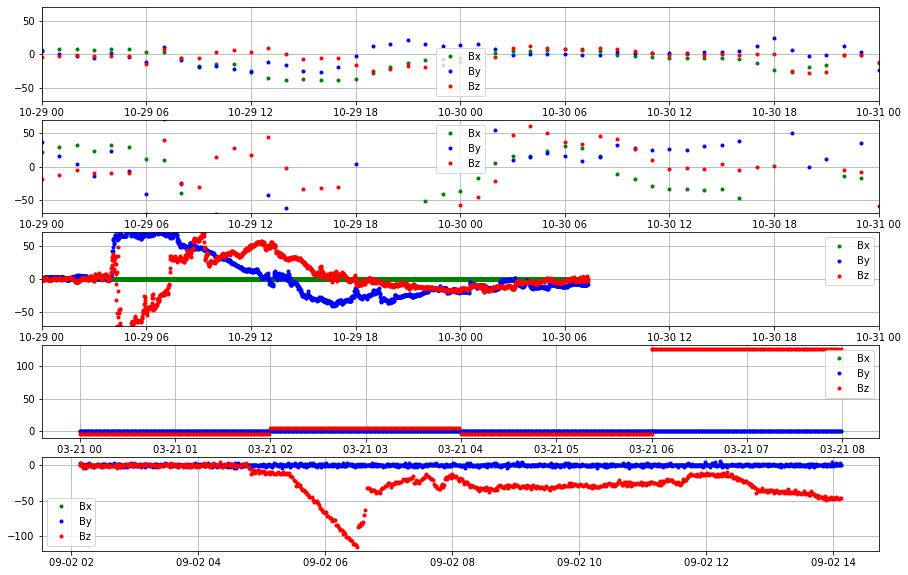

In [221]:
fig = plt.figure(figsize=(15,10))

ylim_low = -70
ylim_high = 70

ax1 = fig.add_subplot(511)
# ax1.plot(pd_actual['datetimes'],
#          pd_actual['AE'],
#          'k.',
#          label='OMNI')
ax1.plot(pd_actual['datetimes'],
         pd_actual['Bx'],
         'g.',
         label='Bx')
ax1.plot(pd_actual['datetimes'],
         pd_actual['By'],
         'b.',
         label='By')
ax1.plot(pd_actual['datetimes'],
         pd_actual['Bz'],
         'r.',
         label='Bz')
plt.legend()

plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
plt.grid(True)


ax2 = fig.add_subplot(512)
ax2.plot(pd_event1['datetimes'],
         pd_event1['Bx'],
         'g.',
         label='Bx')
ax2.plot(pd_event1['datetimes'],
         pd_event1['By'],
         'b.',
         label='By')
ax2.plot(pd_event1['datetimes'],
         pd_event1['Bz'],
         'r.',
         label='Bz')
plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
plt.grid(True)
plt.legend()


ax3 = fig.add_subplot(513)
ax3.plot(pd_event2['datetimes'],
         pd_event2['Bx'],
         'g.',
         label='Bx')
ax3.plot(pd_event2['datetimes'],
         pd_event2['By'],
         'b.',
         label='By')
ax3.plot(pd_event2['datetimes'],
         pd_event2['Bz'],
         'r.',
         label='Bz')
plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
plt.grid(True)
plt.legend()


ax4 = fig.add_subplot(514)
ax4.plot(pd_event3['datetimes'],
         pd_event3['Bx'],
         'g.',
         label='Bx')
ax4.plot(pd_event3['datetimes'],
         pd_event3['By'],
         'b.',
         label='By')
ax4.plot(pd_event3['datetimes'],
         pd_event3['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
plt.grid(True)
plt.legend()



ax5 = fig.add_subplot(515)
ax5.plot(pd_event4['datetimes'],
         pd_event4['Bx'],
         'g.',
         label='Bx')
ax5.plot(pd_event4['datetimes'],
         pd_event4['By'],
         'b.',
         label='By')
ax5.plot(pd_event4['datetimes'],
         pd_event4['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
plt.grid(True)
plt.legend()


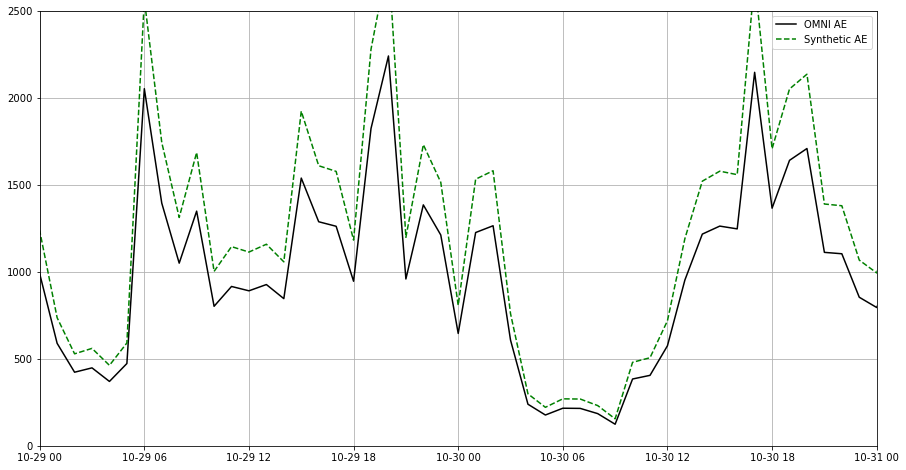

In [187]:
fig = plt.figure(figsize=(15,8))

ylim_low = 0
ylim_high = 2500

ax1 = fig.add_subplot(111)

ax1.plot(pd_actual['datetimes'],
         pd_actual['AE'],
         'k-',
         label='OMNI AE')

ax1.plot(pd_event1['datetimes'],
         pd_event1['AE'],
         'g--',
         label='Synthetic AE')

plt.legend()

plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
plt.grid(True)

